In [2]:
from lightgbm import LGBMRegressor
import optuna
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from prunedcv import PrunedCV
import seaborn as sns
import numpy as np

In [3]:
data = fetch_california_housing()
x = data['data']
y = data['target']

In [4]:
model = LGBMRegressor()

In [6]:
def obejctive_standard(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 5, 100)
    num_leaves = trial.suggest_int('num_leaves', 2, 100)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-0)
    max_depth = trial.suggest_int('max_depth', 2, 1_000)


    params = {        
        'n_estimators': n_estimators,
        'num_leaves': num_leaves,
        'colsample_bytree': colsample_bytree,
        'learning_rate': learning_rate,
        'max_depth': max_depth
    }
    
    model.set_params(**params)

    return - np.mean(cross_val_score(model, x, y, cv=12, scoring='neg_mean_squared_error'))

study_standard = optuna.create_study()

study_standard.optimize(obejctive_standard, timeout=120)

[I 2019-03-19 21:19:43,210] Finished a trial resulted in value: 0.5958921869848147. Current best value is 0.5958921869848147 with parameters: {'n_estimators': 49, 'num_leaves': 50, 'colsample_bytree': 0.7343413580079781, 'learning_rate': 0.02646223241870733, 'max_depth': 790}.
[I 2019-03-19 21:19:45,611] Finished a trial resulted in value: 1.13790877159008. Current best value is 0.5958921869848147 with parameters: {'n_estimators': 49, 'num_leaves': 50, 'colsample_bytree': 0.7343413580079781, 'learning_rate': 0.02646223241870733, 'max_depth': 790}.
[I 2019-03-19 21:19:47,037] Finished a trial resulted in value: 0.5096925242429295. Current best value is 0.5096925242429295 with parameters: {'n_estimators': 88, 'num_leaves': 55, 'colsample_bytree': 0.5718769708386473, 'learning_rate': 0.764318994969143, 'max_depth': 560}.
[I 2019-03-19 21:19:48,959] Finished a trial resulted in value: 0.5745002160441535. Current best value is 0.5096925242429295 with parameters: {'n_estimators': 88, 'num_le

[I 2019-03-19 21:20:18,921] Finished a trial resulted in value: 0.674602221936873. Current best value is 0.3411884482513785 with parameters: {'n_estimators': 80, 'num_leaves': 18, 'colsample_bytree': 0.879036768069856, 'learning_rate': 0.11197408052667535, 'max_depth': 132}.
[I 2019-03-19 21:20:27,508] Finished a trial resulted in value: 0.45468710182415. Current best value is 0.3411884482513785 with parameters: {'n_estimators': 80, 'num_leaves': 18, 'colsample_bytree': 0.879036768069856, 'learning_rate': 0.11197408052667535, 'max_depth': 132}.
[I 2019-03-19 21:20:31,155] Finished a trial resulted in value: 0.780009241148591. Current best value is 0.3411884482513785 with parameters: {'n_estimators': 80, 'num_leaves': 18, 'colsample_bytree': 0.879036768069856, 'learning_rate': 0.11197408052667535, 'max_depth': 132}.
[I 2019-03-19 21:20:32,565] Finished a trial resulted in value: 1.2456592660811923. Current best value is 0.3411884482513785 with parameters: {'n_estimators': 80, 'num_leave

[I 2019-03-19 21:21:16,579] Finished a trial resulted in value: 0.37803151669230034. Current best value is 0.33970595272386944 with parameters: {'n_estimators': 95, 'num_leaves': 45, 'colsample_bytree': 0.935177946888561, 'learning_rate': 0.08459886667434098, 'max_depth': 586}.
[I 2019-03-19 21:21:19,630] Finished a trial resulted in value: 1.3582757960652925. Current best value is 0.33970595272386944 with parameters: {'n_estimators': 95, 'num_leaves': 45, 'colsample_bytree': 0.935177946888561, 'learning_rate': 0.08459886667434098, 'max_depth': 586}.
[I 2019-03-19 21:21:20,967] Finished a trial resulted in value: 0.41586198443854233. Current best value is 0.33970595272386944 with parameters: {'n_estimators': 95, 'num_leaves': 45, 'colsample_bytree': 0.935177946888561, 'learning_rate': 0.08459886667434098, 'max_depth': 586}.
[I 2019-03-19 21:21:22,684] Finished a trial resulted in value: 0.8345477968707429. Current best value is 0.33970595272386944 with parameters: {'n_estimators': 95, 

In [7]:
prun = PrunedCV(12, 0.05)

def objective_pruned(trial):

    n_estimators = trial.suggest_int('n_estimators', 5, 100)
    num_leaves = trial.suggest_int('num_leaves', 2, 100)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-0)
    max_depth = trial.suggest_int('max_depth', 2, 1_000)


    params = {        
        'n_estimators': n_estimators,
        'num_leaves': num_leaves,
        'colsample_bytree': colsample_bytree,
        'learning_rate': learning_rate,
        'max_depth': max_depth
    }
    
    model.set_params(**params)

    return prun.cross_val_score(model, x, y)

study_pruned = optuna.create_study()

study_pruned.optimize(objective_pruned, timeout=120)

[I 2019-03-19 21:21:46,464] Finished a trial resulted in value: 1.2288620194626116. Current best value is 1.2288620194626116 with parameters: {'n_estimators': 57, 'num_leaves': 90, 'colsample_bytree': 0.684446732599298, 'learning_rate': 0.0020364516661190353, 'max_depth': 623}.
[I 2019-03-19 21:21:46,983] Finished a trial resulted in value: 1.3789122486131125. Current best value is 1.2288620194626116 with parameters: {'n_estimators': 57, 'num_leaves': 90, 'colsample_bytree': 0.684446732599298, 'learning_rate': 0.0020364516661190353, 'max_depth': 623}.
[I 2019-03-19 21:21:47,179] Finished a trial resulted in value: 1.3884277572333332. Current best value is 1.2288620194626116 with parameters: {'n_estimators': 57, 'num_leaves': 90, 'colsample_bytree': 0.684446732599298, 'learning_rate': 0.0020364516661190353, 'max_depth': 623}.
[I 2019-03-19 21:21:49,115] Finished a trial resulted in value: 0.4449494470639915. Current best value is 0.4449494470639915 with parameters: {'n_estimators': 44, 

[I 2019-03-19 21:22:12,242] Finished a trial resulted in value: 1.0655246335044193. Current best value is 0.3456166047435781 with parameters: {'n_estimators': 84, 'num_leaves': 92, 'colsample_bytree': 0.8757399482698698, 'learning_rate': 0.10715806239290114, 'max_depth': 261}.
[I 2019-03-19 21:22:13,260] Finished a trial resulted in value: 0.3640597741285564. Current best value is 0.3456166047435781 with parameters: {'n_estimators': 84, 'num_leaves': 92, 'colsample_bytree': 0.8757399482698698, 'learning_rate': 0.10715806239290114, 'max_depth': 261}.
[I 2019-03-19 21:22:13,774] Finished a trial resulted in value: 0.41544729966008903. Current best value is 0.3456166047435781 with parameters: {'n_estimators': 84, 'num_leaves': 92, 'colsample_bytree': 0.8757399482698698, 'learning_rate': 0.10715806239290114, 'max_depth': 261}.
[I 2019-03-19 21:22:14,501] Finished a trial resulted in value: 0.3765677349985186. Current best value is 0.3456166047435781 with parameters: {'n_estimators': 84, 'n

[I 2019-03-19 21:22:25,440] Finished a trial resulted in value: 1.0258324868787507. Current best value is 0.3413550473511171 with parameters: {'n_estimators': 96, 'num_leaves': 59, 'colsample_bytree': 0.8872180495650656, 'learning_rate': 0.0776979434347191, 'max_depth': 406}.
[I 2019-03-19 21:22:25,526] Finished a trial resulted in value: 0.8908811770587617. Current best value is 0.3413550473511171 with parameters: {'n_estimators': 96, 'num_leaves': 59, 'colsample_bytree': 0.8872180495650656, 'learning_rate': 0.0776979434347191, 'max_depth': 406}.
[I 2019-03-19 21:22:25,872] Finished a trial resulted in value: 0.37646218773282714. Current best value is 0.3413550473511171 with parameters: {'n_estimators': 96, 'num_leaves': 59, 'colsample_bytree': 0.8872180495650656, 'learning_rate': 0.0776979434347191, 'max_depth': 406}.
[I 2019-03-19 21:22:26,157] Finished a trial resulted in value: 1.003343193046384. Current best value is 0.3413550473511171 with parameters: {'n_estimators': 96, 'num_l

[I 2019-03-19 21:22:41,861] Finished a trial resulted in value: 0.4078440731076544. Current best value is 0.3413550473511171 with parameters: {'n_estimators': 96, 'num_leaves': 59, 'colsample_bytree': 0.8872180495650656, 'learning_rate': 0.0776979434347191, 'max_depth': 406}.
[I 2019-03-19 21:22:42,327] Finished a trial resulted in value: 0.4909298772730181. Current best value is 0.3413550473511171 with parameters: {'n_estimators': 96, 'num_leaves': 59, 'colsample_bytree': 0.8872180495650656, 'learning_rate': 0.0776979434347191, 'max_depth': 406}.
[I 2019-03-19 21:22:42,467] Finished a trial resulted in value: 0.4084994367552757. Current best value is 0.3413550473511171 with parameters: {'n_estimators': 96, 'num_leaves': 59, 'colsample_bytree': 0.8872180495650656, 'learning_rate': 0.0776979434347191, 'max_depth': 406}.
[I 2019-03-19 21:22:42,948] Finished a trial resulted in value: 0.3637681528726417. Current best value is 0.3413550473511171 with parameters: {'n_estimators': 96, 'num_l

[I 2019-03-19 21:22:54,829] Finished a trial resulted in value: 1.090558781525388. Current best value is 0.339150034920553 with parameters: {'n_estimators': 64, 'num_leaves': 69, 'colsample_bytree': 0.999982338756556, 'learning_rate': 0.12844602310660108, 'max_depth': 226}.
[I 2019-03-19 21:22:55,544] Finished a trial resulted in value: 0.36580379945824626. Current best value is 0.339150034920553 with parameters: {'n_estimators': 64, 'num_leaves': 69, 'colsample_bytree': 0.999982338756556, 'learning_rate': 0.12844602310660108, 'max_depth': 226}.
[I 2019-03-19 21:22:56,019] Finished a trial resulted in value: 0.8542295290308787. Current best value is 0.339150034920553 with parameters: {'n_estimators': 64, 'num_leaves': 69, 'colsample_bytree': 0.999982338756556, 'learning_rate': 0.12844602310660108, 'max_depth': 226}.
[I 2019-03-19 21:22:56,318] Finished a trial resulted in value: 0.6485275251187693. Current best value is 0.339150034920553 with parameters: {'n_estimators': 64, 'num_leave

[I 2019-03-19 21:23:11,708] Finished a trial resulted in value: 0.38753909015112786. Current best value is 0.33881067364307205 with parameters: {'n_estimators': 93, 'num_leaves': 84, 'colsample_bytree': 0.8602792085874245, 'learning_rate': 0.12077317661267975, 'max_depth': 192}.
[I 2019-03-19 21:23:12,181] Finished a trial resulted in value: 0.37057903986820756. Current best value is 0.33881067364307205 with parameters: {'n_estimators': 93, 'num_leaves': 84, 'colsample_bytree': 0.8602792085874245, 'learning_rate': 0.12077317661267975, 'max_depth': 192}.
[I 2019-03-19 21:23:12,578] Finished a trial resulted in value: 0.36781355597217236. Current best value is 0.33881067364307205 with parameters: {'n_estimators': 93, 'num_leaves': 84, 'colsample_bytree': 0.8602792085874245, 'learning_rate': 0.12077317661267975, 'max_depth': 192}.
[I 2019-03-19 21:23:13,057] Finished a trial resulted in value: 0.3748618058988166. Current best value is 0.33881067364307205 with parameters: {'n_estimators': 

[I 2019-03-19 21:23:25,319] Finished a trial resulted in value: 0.408799239312914. Current best value is 0.3378513498160045 with parameters: {'n_estimators': 100, 'num_leaves': 44, 'colsample_bytree': 0.9068366523140337, 'learning_rate': 0.1214158461039946, 'max_depth': 107}.
[I 2019-03-19 21:23:25,582] Finished a trial resulted in value: 0.5219151946938825. Current best value is 0.3378513498160045 with parameters: {'n_estimators': 100, 'num_leaves': 44, 'colsample_bytree': 0.9068366523140337, 'learning_rate': 0.1214158461039946, 'max_depth': 107}.
[I 2019-03-19 21:23:26,501] Finished a trial resulted in value: 0.36956027658218615. Current best value is 0.3378513498160045 with parameters: {'n_estimators': 100, 'num_leaves': 44, 'colsample_bytree': 0.9068366523140337, 'learning_rate': 0.1214158461039946, 'max_depth': 107}.
[I 2019-03-19 21:23:26,722] Finished a trial resulted in value: 0.4831675443623239. Current best value is 0.3378513498160045 with parameters: {'n_estimators': 100, 'n

[I 2019-03-19 21:23:38,246] Finished a trial resulted in value: 0.4093198993576411. Current best value is 0.3367808737098259 with parameters: {'n_estimators': 62, 'num_leaves': 66, 'colsample_bytree': 0.8922129930689786, 'learning_rate': 0.13716114349466596, 'max_depth': 83}.
[I 2019-03-19 21:23:38,733] Finished a trial resulted in value: 0.4017340092918092. Current best value is 0.3367808737098259 with parameters: {'n_estimators': 62, 'num_leaves': 66, 'colsample_bytree': 0.8922129930689786, 'learning_rate': 0.13716114349466596, 'max_depth': 83}.
[I 2019-03-19 21:23:39,193] Finished a trial resulted in value: 0.4118234459789971. Current best value is 0.3367808737098259 with parameters: {'n_estimators': 62, 'num_leaves': 66, 'colsample_bytree': 0.8922129930689786, 'learning_rate': 0.13716114349466596, 'max_depth': 83}.
[I 2019-03-19 21:23:39,519] Finished a trial resulted in value: 0.44175405347299085. Current best value is 0.3367808737098259 with parameters: {'n_estimators': 62, 'num_

In [8]:
df_prun = study_pruned.trials_dataframe()
df_stan = study_standard.trials_dataframe()

In [9]:
df_prun['time'] = (df_prun.datetime_start - df_prun.datetime_start.min()).astype('int') / 1_000_000_000
df_stan['time'] = (df_stan.datetime_start - df_stan.datetime_start.min()).astype('int') / 1_000_000_000

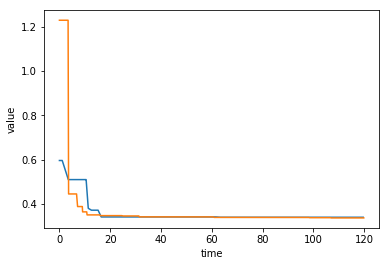

In [10]:
sns.lineplot(x=df_stan.time, y=df_stan.value.cummin());
sns.lineplot(x=df_prun.time, y=df_prun.value.cummin());

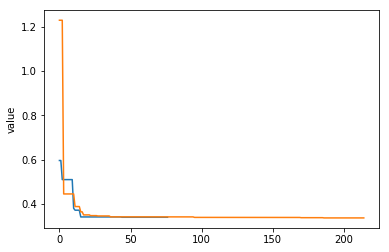

In [11]:
sns.lineplot(x=df_stan.index, y=df_stan.value.cummin());
sns.lineplot(x=df_prun.index, y=df_prun.value.cummin());

In [12]:
df_prun.shape[0] / df_stan.shape[0]

2.792207792207792